In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df=pd.read_csv('D:/Downloads/train_loan.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()      #for non-numerical value we can see frequency distribution

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df['ApplicantIncome'].hist(bins=50)    

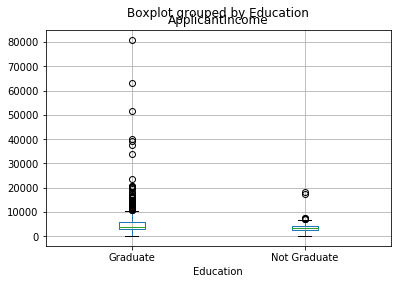

In [13]:
df.boxplot(column='ApplicantIncome',by='Education')

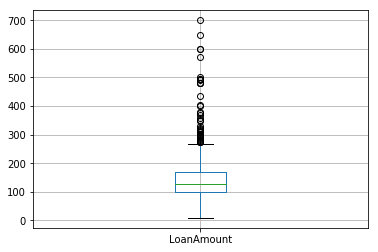

In [14]:
df.boxplot('LoanAmount')

In [15]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
temp=pd.crosstab(df['Credit_History'],df['Loan_Status'])

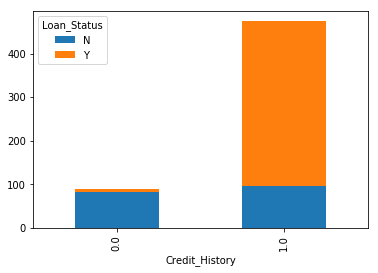

In [17]:
temp.plot(kind='bar',stacked=True,grid=False)

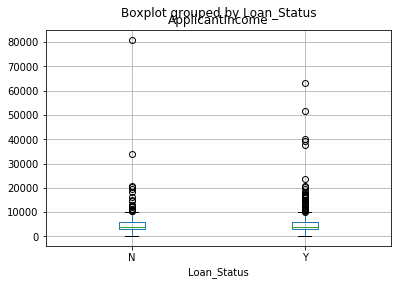

In [18]:
df.boxplot('ApplicantIncome' ,by='Loan_Status')

In [19]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [23]:
df['Self_Employed'].fillna('No',inplace=True)

In [24]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [25]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [26]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

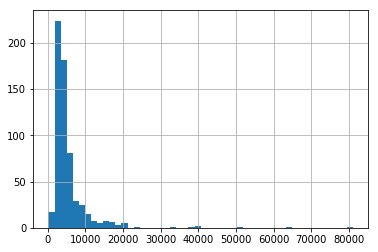

In [27]:
df['ApplicantIncome'].hist(bins=50)

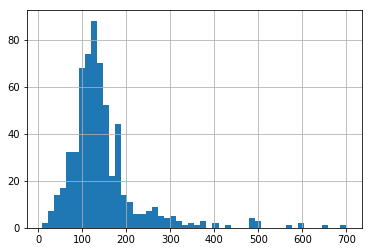

In [28]:
df['LoanAmount'].hist(bins=50)

In [29]:
#  Treatment of Extreme values for ApplicantIncome and LoanAmount

df['LoanAmount']=np.log(df['LoanAmount'])

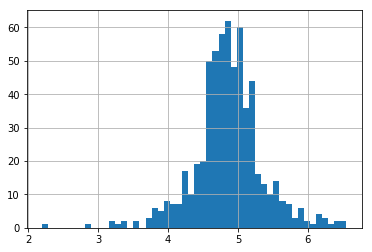

In [30]:
df['LoanAmount'].hist(bins=50)

In [31]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

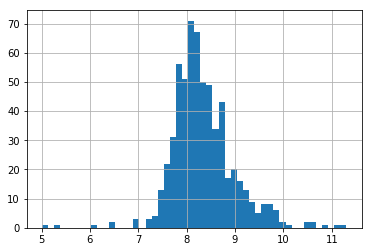

In [32]:
df['ApplicantIncome'].hist(bins=50)

In [33]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [35]:
df['Credit_History'].dtype

dtype('float64')

In [36]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [37]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
x_train=df.iloc[:,1:12].values

In [40]:
x_train

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [41]:
y_train=df.iloc[:,12]

In [42]:
y_train.shape

(614,)

In [43]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [44]:
le=LabelEncoder()

In [45]:
for i in range(0,5):
    x_train[:,i] = le.fit_transform(x_train[:,i])

In [46]:
x_train

array([[1, 0, 0, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 1, ..., 360.0, 1.0, 'Rural'],
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 1, 1, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 2, ..., 360.0, 1.0, 'Urban'],
       [0, 0, 0, ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [47]:

x_train[:,10]=le.fit_transform(x_train[:,10])

In [48]:
y_train=le.fit_transform(y_train)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_x,test_x,train_y,test_y=train_test_split(x_train,y_train,test_size=0.30,random_state=1)

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()

In [53]:
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred=model.predict(test_x)

In [55]:
from sklearn import metrics

In [56]:
metrics.accuracy_score(y_pred,test_y)

0.7891891891891892

In [57]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

In [58]:
tree=DecisionTreeClassifier(criterion='entropy')

In [59]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
tree_pred=tree.predict(test_x)

In [61]:
metrics.accuracy_score(tree_pred,test_y)

0.6864864864864865

In [62]:
# Random forest Tree
from sklearn.ensemble import RandomForestRegressor

D:\Anaconda_linux\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
random=RandomForestRegressor()

In [64]:
random.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
rand_pred=random.predict(test_x)